In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(style="white", palette="ch:s=.25,rot=-.25")

Carregando os dois conjuntos de dados de cervejas produzidas artesanalmente e seus respectivos fabricantes.

In [2]:
beers = pd.read_csv('http://neurae.com.br/UEL/datasets/beers.csv')
breweries = pd.read_csv('http://neurae.com.br/UEL/datasets/breweries.csv')

In [3]:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Remoção de coluna desnecessária ('Unnamed: 0') para a análise e visualização de alguns dados das cervejas produzidas.

In [5]:
beers = beers.drop(columns=['Unnamed: 0'])

Alteração do nome da coluna 'Unnamed: 0' para 'brewery_id', para concatenarmos os datasets de cervejas e fabricantes.

In [6]:
breweries.columns = ['brewery_id', 'name', 'city', 'state']
breweries.head()

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Concatenação dos dois dataframes utilizando a coluna 'brewery_id'

In [7]:
data  = pd.merge(beers, breweries, on='brewery_id')

Alteração dos nomes das colunas

In [8]:
data.columns = ['ABV', 'IBU', 'BeerID', 'BeerName', 'Style', 'BreweryID', 'Ounces', 'BreweryName', 'City', 'State']

Alcohol by Volume (ABV): É definido como o volume em ml de etanol puro em 100 ml de uma solução a 20°C. Ou seja, uma cerveja com 10% de ABV contém 10 ml de etanol puro a cada 100 ml de cerveja

International Biterness Unit (IBU): Ela representa um número absoluto da conversão dos alfa-ácidos da cerveja em iso-alfa-ácidos que gera esta sensação de amargor cerveja.

Id: Identificador único do determinado tipo de cerveja.

Name: Nome do produto.

Style: Categoria a qual aquele produto pertence seguindo as classificações da Brewers Association.

Brewery ID: Identificador único do fabricante.

Ounces: Quantidade de cerveja por embalagem em onças.

In [9]:
data.head()

,ABV,IBU,BeerID,BeerName,Style,BreweryID,Ounces,BreweryName,City,State
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


Criação da coluna "Ml", onde convertemos a quantidade de cerveja em onças para mililitros e posterior remoção da coluna 'Ounces'.

In [10]:
data['Ml'] = data['Ounces'] * 29.5735
data.drop(columns=['Ounces'], inplace=True)

Transformando o ABV em porcentagem.

In [11]:
data['ABV'] = data['ABV'] * 100

In [12]:
data.head()

,ABV,IBU,BeerID,BeerName,Style,BreweryID,BreweryName,City,State,Ml
0,5.0,NaN,1436,Pub Beer,American Pale Lager,408,10 Barrel Brewing Company,Bend,OR,354.882
1,6.6,NaN,2265,Devil's Cup,American Pale Ale (APA),177,18th Street Brewery,Gary,IN,354.882
2,7.1,NaN,2264,Rise of the Phoenix,American IPA,177,18th Street Brewery,Gary,IN,354.882
3,9.0,NaN,2263,Sinister,American Double / Imperial IPA,177,18th Street Brewery,Gary,IN,354.882
4,7.5,NaN,2262,Sex and Candy,American IPA,177,18th Street Brewery,Gary,IN,354.882


ABV Mínimo 0.1
ABV Medio 5.977342419080068
ABV Máximo 12.8


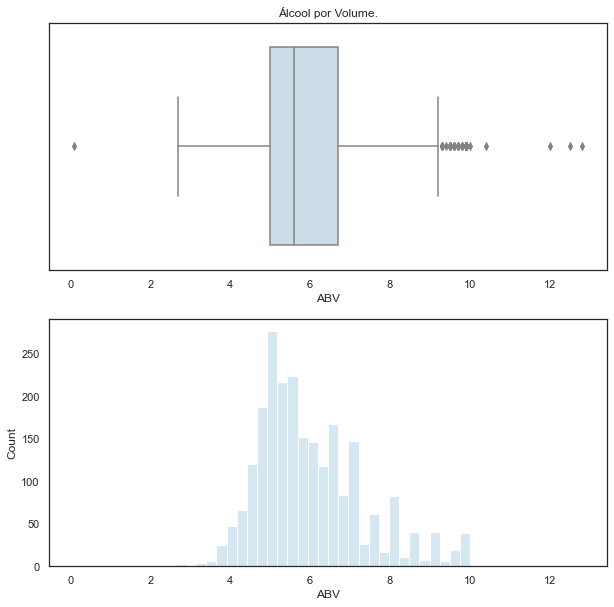

In [13]:
print('ABV Mínimo', data.ABV.min())
print('ABV Medio', data.ABV.mean())
print('ABV Máximo', data.ABV.max())

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title('Álcool por Volume.')
sns.boxplot(x='ABV', data=data)

plt.subplot(2,1,2)
sns.histplot(data=data, x=data.ABV)

plt.show()

IBU Mínimo 4.0
IBU Medio 42.71316725978647
IBU Máximo 138.0


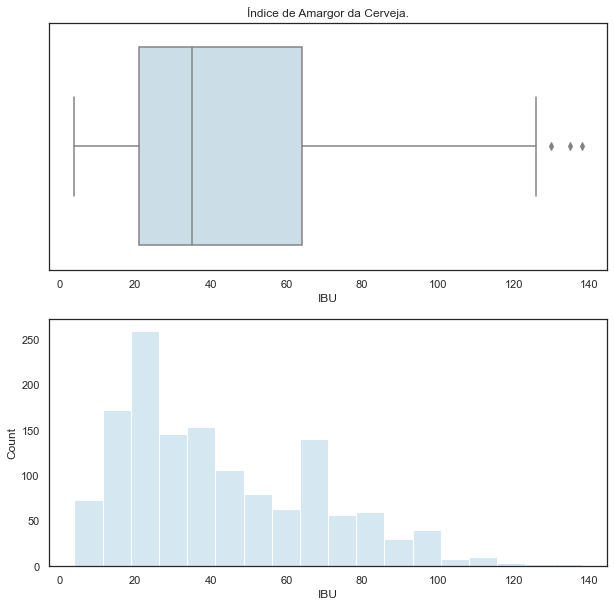

In [14]:
print('IBU Mínimo', data.IBU.min())
print('IBU Medio', data.IBU.mean())
print('IBU Máximo', data.IBU.max())

plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
plt.title('Índice de Amargor da Cerveja.')
sns.boxplot(x='IBU', data=data)

plt.subplot(2,1,2)
sns.histplot(data=data, x=data.IBU)

plt.show()


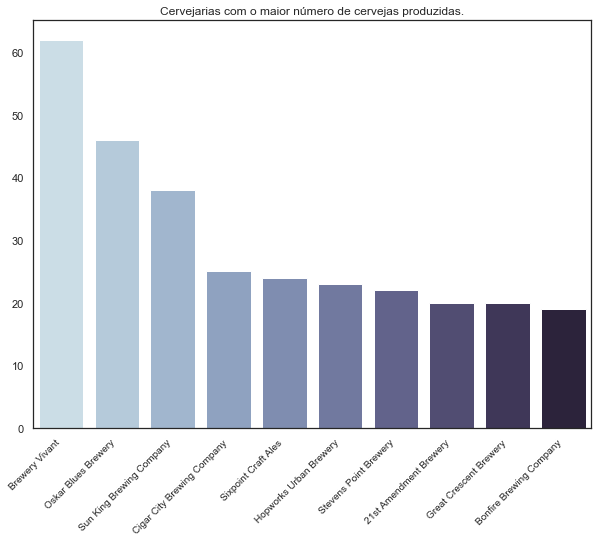

In [15]:
largest_breweries = data['BreweryName'].value_counts().nlargest(10)

plt.figure(figsize=(10,7.5))
sns.barplot(x=largest_breweries.index, y=largest_breweries.values, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Cervejarias com o maior número de cervejas produzidas.')
plt.show()

Todas as cervejas produzidas pelo maior fabricante (Brewery Vivant)

In [16]:
data.loc[data.BreweryName == 'Brewery Vivant']['BeerName'].values

array(['Belfort', 'Star Runner', 'Tart Side of the Barrel',
       'Linnaeus Mango IPA', "Beasts A'Burnin'", 'Verdun',
       'Barrel Aged Triomphe', 'Cherry Doppelbock', 'Tropical Saison',
       'Beach Patrol', 'Nuit Serpent', 'Paris', 'The Grand Army',
       'Acidulated Trip', 'Root Stock', 'Mind Games', 'Sous Chef',
       'Dubbelicious', 'Psychopomp', 'Fat Paczki', 'Earth-Like Planets',
       'Ski Patrol', 'Viking Ice Hole', 'Rye Porter',
       'Wizard Burial Ground', 'Smoky Wheat', 'BRIPA', 'Mela',
       'W.I.P.A Snappa', 'Pepper in the Rye', "Moe Lasses'",
       'Pumpkin Tart', 'Undertaker', 'Undertaker (2014)', "Coq D'Or",
       'North French', 'Agent a Deux', 'Belgian Wit', 'Pothole Stout',
       'Tree Bucket', 'Le Flaneur Ale', 'Maize & Blueberry',
       'Trebuchet Double IPA', 'Contemplation', 'Black Rabbit', 'Zaison',
       'Vivant Tripel', 'Tart Side of the Moon', 'Big Red Coq',
       'Hubris Quadrupel Anniversary Ale',
       'Plow Horse Belgian Style Imperial S

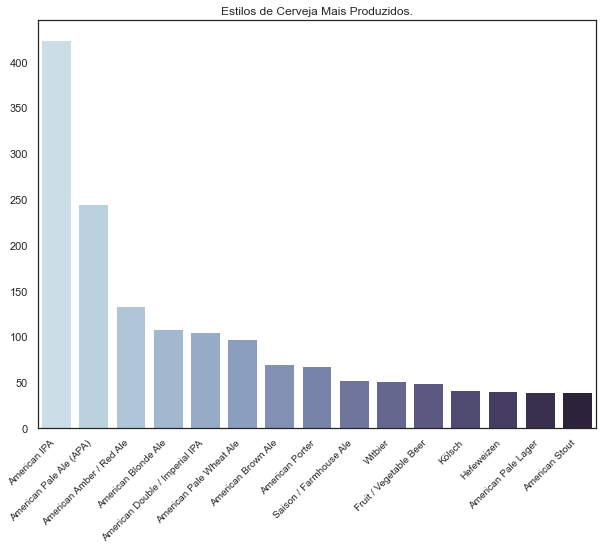

In [17]:
favorite_styles = data['Style'].value_counts().nlargest(15)

plt.figure(figsize=(10,7.5))
sns.barplot(x=favorite_styles.index, y=favorite_styles.values, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Estilos de Cerveja Mais Produzidos.')
plt.show()

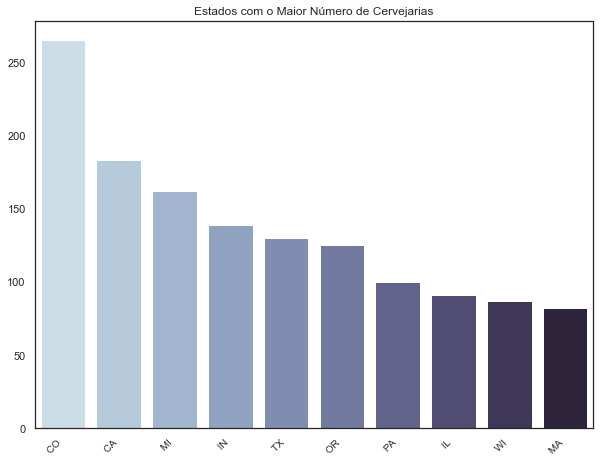

In [18]:
largest = data.State.value_counts().nlargest(10)

plt.figure(figsize=(10,7.5))
sns.barplot(x=largest.index, y=largest.values, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Estados com o Maior Número de Cervejarias')
plt.show()